List of emails:
Analysis for:  richard.causey@enron.com
NO emails sent!


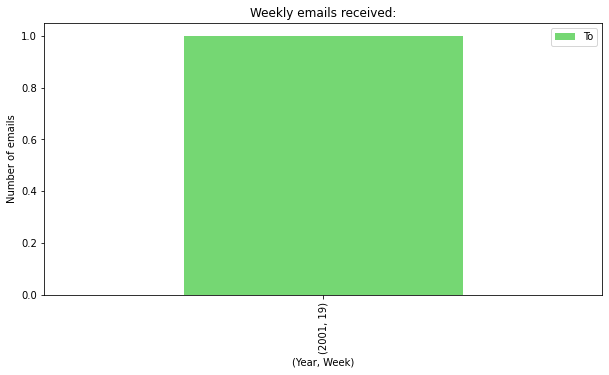

In [ ]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
from matplotlib import pyplot as plt

df = pd.read_csv("enron_test.csv") 
df["new_date"] = df["new_date"].astype("datetime64")

# email = input("Enter Email for Analysis:")
email = 'richard.causey@enron.com'
from_filter = df['From'].apply(lambda x: email in str(x))
to_filter = df['To'].apply(lambda x: email in str(x))


to_filtered_data = df.loc[to_filter][['To']]
from_filtered_data = df.loc[from_filter][['From']]

print("Analysis for: ", email)
if to_filtered_data.size > 0:
  to_filtered_data.groupby([df["new_date"].dt.year, df["new_date"].dt.isocalendar().week]).count().plot(kind="bar", figsize=(10,5), color='#75d773', title = "Weekly emails received:", xlabel = '(Year, Week)', ylabel = 'Number of emails')
else:
  print("NO emails received!")

if from_filtered_data.size > 0:
  from_filtered_data.groupby([df["new_date"].dt.year, df["new_date"].dt.isocalendar().week]).count().plot(kind="bar", figsize=(15,5), color='#2173e7', title = "Weekly emails sent:", xlabel = '(Year, Week)', ylabel = 'Number of emails')
else:
  print("NO emails sent!")

plt.show()